In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('application_data.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OW0_CAR,FLAG_OW0_REALT1,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,0,0,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents
307507,456252,0,Cash loans,F,0,1,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment
307508,456253,0,Cash loans,F,0,1,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment
307509,456254,1,Cash loans,F,0,1,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment


In [3]:
df=df.dropna(how='any')

In [4]:
df.drop('FLAG_OW0_REALT1', axis=1, inplace=True)  

C:\Users\Saul\AppData\Local\Temp\ipykernel_5156\3840328642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('FLAG_OW0_REALT1', axis=1, inplace=True)


In [5]:
df


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OW0_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,100002,1,Cash loans,M,0,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
1,100003,0,Cash loans,F,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment
2,100004,0,Revolving loans,M,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
3,100006,0,Cash loans,F,0,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment
4,100007,0,Cash loans,M,0,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,0,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents
307507,456252,0,Cash loans,F,0,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment
307508,456253,0,Cash loans,F,0,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment
307509,456254,1,Cash loans,F,0,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment


# ORDINAL ENCODING  

In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [7]:
enc = OrdinalEncoder(categories = [['Cash loans', 'Revolving loans']])
enc.fit(df[['NAME_CONTRACT_TYPE']])
df['NAME_CONTRACT_TYPE']=enc.transform(df[['NAME_CONTRACT_TYPE']])

C:\Users\Saul\AppData\Local\Temp\ipykernel_5156\927403176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NAME_CONTRACT_TYPE']=enc.transform(df[['NAME_CONTRACT_TYPE']])


In [8]:
enc = OrdinalEncoder(categories = [['Unemployed', 'Maternity leave', 'Pensioner', 'Student',
       'State servant', 'Commercial associate', 'Businessman', 'Working']])
enc.fit(df[['NAME_INCOME_TYPE']])
df['NAME_INCOME_TYPE']=enc.transform(df[['NAME_INCOME_TYPE']])

C:\Users\Saul\AppData\Local\Temp\ipykernel_5156\1210352671.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NAME_INCOME_TYPE']=enc.transform(df[['NAME_INCOME_TYPE']])


In [9]:
enc = OrdinalEncoder(categories = [['Lower secondary','Incomplete higher' ,'Secondary / secondary special', 'Academic degree', 'Higher education']])
enc.fit(df[['NAME_EDUCATION_TYPE']])
df['NAME_EDUCATION_TYPE']=enc.transform(df[['NAME_EDUCATION_TYPE']])

C:\Users\Saul\AppData\Local\Temp\ipykernel_5156\1219168457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NAME_EDUCATION_TYPE']=enc.transform(df[['NAME_EDUCATION_TYPE']])


In [10]:
enc = OrdinalEncoder(categories = [['Unknown','Single / not married', 'Widow', 'Separated', 'Civil marriage', 'Married']])
enc.fit(df[['NAME_FAMILY_STATUS']])
df['NAME_FAMILY_STATUS']=enc.transform(df[['NAME_FAMILY_STATUS']])

C:\Users\Saul\AppData\Local\Temp\ipykernel_5156\2366702243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NAME_FAMILY_STATUS']=enc.transform(df[['NAME_FAMILY_STATUS']])


In [11]:
enc = OrdinalEncoder(categories = [['Rented apartment', 'With parents', 'Municipal apartment',  'Co-op apartment','House / apartment',  'Office apartment']])
enc.fit(df[['NAME_HOUSING_TYPE']])
df['NAME_HOUSING_TYPE']=enc.transform(df[['NAME_HOUSING_TYPE']])

C:\Users\Saul\AppData\Local\Temp\ipykernel_5156\1477997118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NAME_HOUSING_TYPE']=enc.transform(df[['NAME_HOUSING_TYPE']])


In [12]:
enc = OrdinalEncoder(categories = [['M', 'F', 'XNA']])
enc.fit(df[['CODE_GENDER']])
df['CODE_GENDER']=enc.transform(df[['CODE_GENDER']])

C:\Users\Saul\AppData\Local\Temp\ipykernel_5156\970889076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CODE_GENDER']=enc.transform(df[['CODE_GENDER']])


In [13]:
enc = OrdinalEncoder(categories = [['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', 'Other_B', 'Group of people']])
enc.fit(df[['NAME_TYPE_SUITE']])
df['NAME_TYPE_SUITE']=enc.transform(df[['NAME_TYPE_SUITE']])

C:\Users\Saul\AppData\Local\Temp\ipykernel_5156\419538913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NAME_TYPE_SUITE']=enc.transform(df[['NAME_TYPE_SUITE']])


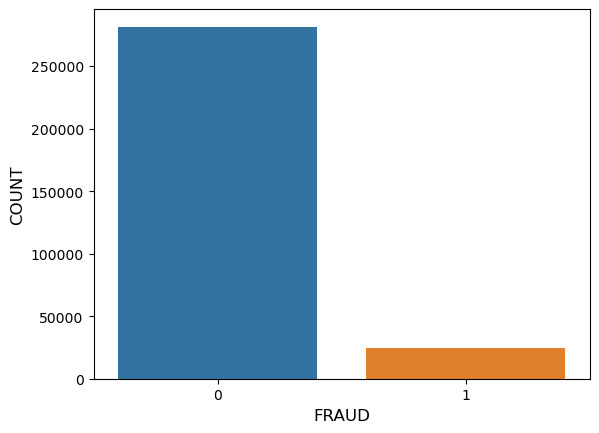

In [14]:
fraud_count= sns.countplot(x='TARGET', data=df)
fraud_count.set_xlabel("FRAUD", fontsize=12)
fraud_count.set_ylabel("COUNT", fontsize=12)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
from sklearn.pipeline import Pipeline

# X-Y SPLIT

In [16]:
from sklearn.model_selection import train_test_split 

In [17]:
print(df.columns.values)

['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OW0_CAR'
 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT' 'AMT_ANNUITY'
 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE']


In [18]:
X = df[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OW0_CAR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']]
y = df[['TARGET']]

# TRAIN-TEST SPLIT

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =100)

In [20]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install --upgrade scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
from imblearn.over_sampling import SMOTE 

In [21]:
y_train

,TARGET
222035,0
75503,1
96369,1
12281,0
47542,0
...,...
65884,1
254847,0
211632,0
56309,0


In [22]:
y_train['TARGET'].value_counts()

0    196953
1     17391
Name: TARGET, dtype: int64

In [23]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [24]:
y_train_res

,TARGET
0,0
1,1
2,1
3,0
4,0
...,...
393901,1
393902,1
393903,1
393904,1


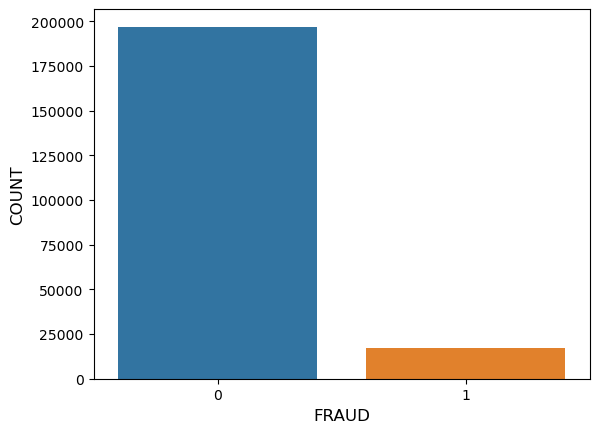

In [25]:
fraud_count= sns.countplot(x='TARGET', data=y_train)
fraud_count.set_xlabel("FRAUD", fontsize=12)
fraud_count.set_ylabel("COUNT", fontsize=12)
plt.show()

In [26]:
y_train_res['TARGET'].value_counts()

0    196953
1    196953
Name: TARGET, dtype: int64

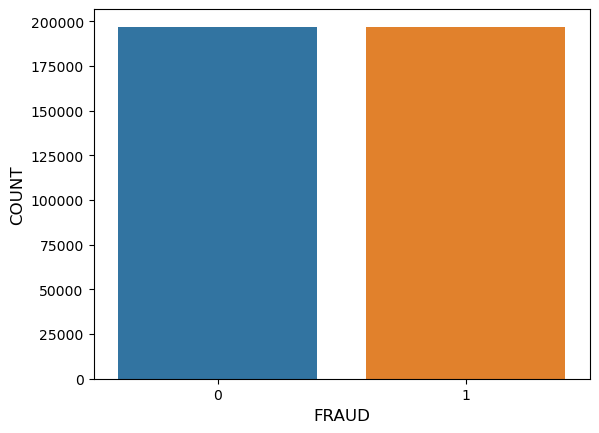

In [27]:
fraud_count_2= sns.countplot(x='TARGET', data=y_train_res)
fraud_count_2.set_xlabel("FRAUD", fontsize=12)
fraud_count_2.set_ylabel("COUNT", fontsize=12)
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix 

In [38]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res) 
predictions = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

C:\Users\Saul\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.94      0.51      0.66     84499
           1       0.10      0.60      0.17      7364

    accuracy                           0.52     91863
   macro avg       0.52      0.55      0.41     91863
weighted avg       0.87      0.52      0.62     91863

